<a href="https://colab.research.google.com/github/ChahatUpadhyay/AI_Smartinez_Work/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab import files
from keras.preprocessing import image

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list


ref                                                           title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                             Chocolate Sales Data 📊🍫                                  14473  2025-03-19 03:51:40.270000          10508        183  1.0              
abdulmalik1518/mobiles-dataset-2025                           Mobiles Dataset (2025)                                   20314  2025-02-18 06:50:24.370000          16563        281  1.0              
adilshamim8/student-depression-dataset                        Student Depression Dataset                              467020  2025-03-13 03:12:30.423000           3112         56  1.0              
mahmoudelh

In [ ]:
!kaggle datasets download -d iamsouravbanerjee/animal-image-dataset-90-different-animals

Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals
License(s): other
animal-image-dataset-90-different-animals.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
with zipfile.ZipFile('animal-image-dataset-90-different-animals.zip', 'r') as zip_ref:
    zip_ref.extractall('animal_dataset')


Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 90)                  │          11,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,630,426 (10.03 MB)

 Trainable params: 372,442 (1.42 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 119s 793ms/step - accuracy: 0.0122 - loss: 4.6884 - val_accuracy: 0.0546 - val_loss: 4.3806 - learning_rate: 1.0000e-04
Epoch 2/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 129s 743ms/step - accuracy: 0.0274 - loss: 4.4306 - val_accuracy: 0.1194 - val_loss: 4.2645 - learning_rate: 1.0000e-04
Epoch 3/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 139s 721ms/step - accuracy: 0.0504 - loss: 4.2960 - val_accuracy: 0.2417 - val_loss: 4.0200 - learning_rate: 1.0000e-04
Epoch 4/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 91s 675ms/step - accuracy: 0.0952 - loss: 4.0863 - val_accuracy: 0.3787 - val_loss: 3.6383 - learning_rate: 1.0000e-04
Epoch 5/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 91s 676ms/step - accuracy: 0.1634 - loss: 3.7673 - val_accuracy: 0.4741 - val_loss: 3.1352 - learning_rate: 1.0000e-04
Epoch 6/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 144s 690ms/step - accuracy: 0.2209 - loss: 3.4139 - val_accuracy: 0.5361 - val_loss: 2.6571 - learning_rate: 1.0000e-04
Epoch 7/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 93

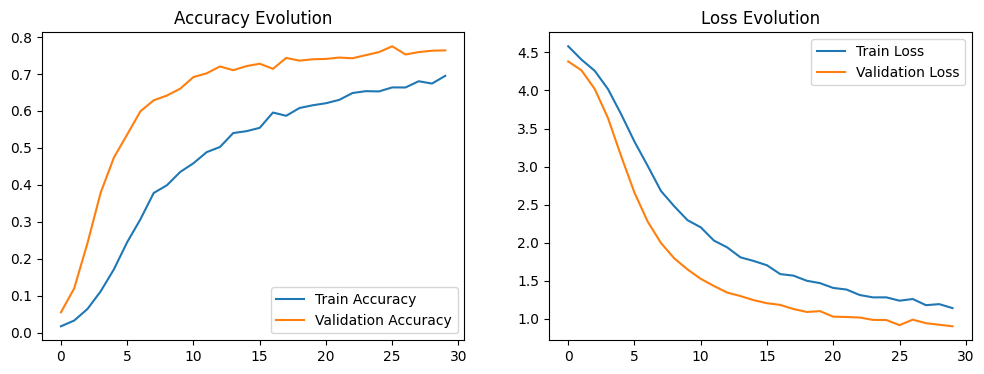

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# ---------------------------
# Enhanced Data Augmentation
# ---------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    fill_mode='nearest',
    validation_split=0.2
)

# Increased image size for better feature extraction
IMG_SIZE = (200, 200)
BATCH_SIZE = 32

train_generator = train_datagen.flow_from_directory(
    '/content/animal_dataset/animals/animals',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/animal_dataset/animals/animals',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# ---------------------------
# Improved CNN Architecture
# ---------------------------
model = Sequential()

# Input layer
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=IMG_SIZE + (3,)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

# Additional Conv-Pool block
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.4))

# Flatten layer
model.add(Flatten())

# Hidden layers with better regularization
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.4))

# Output layer
model.add(Dense(90, activation='softmax'))

# Optimized learning rate and compilation
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ---------------------------
# Enhanced Training with Callbacks
# ---------------------------
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
)

# ---------------------------
# Model Evaluation
# ---------------------------
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

# Final evaluation
test_loss, test_acc = model.evaluate(validation_generator)
print(f"\nFinal Validation Accuracy: {test_acc:.2%}")
print(f"Final Validation Loss: {test_loss:.4f}")

# Prediction function
def predict_animal(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=IMG_SIZE)
    img_array = tf.keras.utils.img_to_array(img)/255.
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predicted_class = train_generator.class_indices.inverse()[np.argmax(predictions)]

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    return predicted_class

# Test with sample image
uploaded = files.upload()
for fn in uploaded.keys():
    print(predict_animal(f'/content/{fn}'))